In [61]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2019'

In [62]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          950 non-null    object 
 1   Authors                 852 non-null    object 
 2   Author Affiliations     852 non-null    object 
 3   Publication Title       950 non-null    object 
 4   Date Added To Xplore    950 non-null    object 
 5   Publication Year        950 non-null    int64  
 6   Volume                  950 non-null    int64  
 7   Issue                   950 non-null    int64  
 8   Start Page              950 non-null    object 
 9   End Page                950 non-null    object 
 10  Abstract                950 non-null    object 
 11  ISSN                    950 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     950 non-null    object 
 14  Funding Information     640 non-null    ob

In [63]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          950 non-null    object 
 1   Authors                 852 non-null    object 
 2   Author Affiliations     852 non-null    object 
 3   Publication Title       950 non-null    object 
 4   Date Added To Xplore    950 non-null    object 
 5   Publication Year        950 non-null    int64  
 6   Volume                  950 non-null    int64  
 7   Issue                   950 non-null    int64  
 8   Start Page              950 non-null    object 
 9   End Page                950 non-null    object 
 10  Abstract                950 non-null    object 
 11  ISSN                    950 non-null    object 
 12  DOI                     950 non-null    object 
 13  Funding Information     640 non-null    object 
 14  PDF Link                950 non-null    ob

In [64]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              852 non-null    object
 1   Author Affiliations  852 non-null    object
 2   Publication Year     950 non-null    int64 
 3   Funding Information  640 non-null    object
 4   Author Keywords      845 non-null    object
 5   IEEE Terms           866 non-null    object
dtypes: int64(1), object(5)
memory usage: 44.7+ KB


In [65]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              852 non-null    object
 1   Author Affiliations  852 non-null    object
 2   Publication Year     852 non-null    int64 
 3   Funding Information  640 non-null    object
 4   Author Keywords      845 non-null    object
 5   IEEE Terms           852 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.1+ KB


In [66]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,L. Liu; C. Liu; Z. Li; X. Yin; Z. N. Chen,Nanjing University of Posts and Telecommunicat...,2019,National Natural Science Foundation of China(g...,Miniaturization;mutual coupling;slit-slot line...,Slot antennas;Antenna arrays;Power transmissio...
1,S. Zarbakhsh; M. Akbari; F. Samadi; A. -R. Sebak,Department of Electrical and Computer Engineer...,2019,NaN,Antenna;circularly polarization (CP);Fabry–Per...,Frequency selective surfaces;Broadband antenna...
2,M. Bodehou; C. Craeye; E. Martini; I. Huynen,"ICTEAM Institute, Université catholique de Lou...",2019,Belgium Fonds National de la Recherche Scienti...,Basis functions;beam shaping;impedance boundar...,Impedance;Surface impedance;Antenna radiation ...
3,M. -C. Tang; Z. Wu; T. Shi; R. W. Ziolkowski,Key Laboratory of Dependable Service Computing...,2019,National Natural Science Foundation of China(g...,Directivity;dual band;electrically small anten...,Dual band;Dipole antennas;Antenna measurements...
4,J. C. Prather; M. Bolt; T. Horton; B. Bottenfi...,Department of Electrical and Computer Engineer...,2019,National Oceanic and Atmospheric Administratio...,Antennas;biomimetic;dipole;drooping dipole;fle...,Rotors;Dipole antennas;Atmospheric measurement...


In [67]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            # pass
            print(author)
        # if aff.split(', ')[-1] in ():
        #     print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

T. K. Sarkar
G. Lombardi
V. Monebhurrun
M. Krairiksh
H. Al-Saedi
W. M. Abdel-Wahab
S. M. Raeis-Zadeh
E. H. M. Alian
A. Palizban
A. Ehsandar
N. Ghafarian
G. Chen
S. R. Boroujeni
M. -R. Nezhad-Ahmadi
S. Safavi-Naeini


In [68]:
south_korea = ('Republic of Korea', 'Korea', 'KR',)
uae = ('United Arab Emirates',)
turkey = ('Türkiye', 'Türkey', 'TR',)
hong_kong = ('Hong Kong SAR', 'Hong Kong SAR China', 'HK',)
the_netherlands = ('Netherlands', 'The Netherland', 'NL',)
sar_china = ('SAR',)
uk = ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', 'GB', )
china = ('China,', "People's Republic of China", 'P. R. China', 'China.', 'Fuzhou', 'Shanxi', 'CN', )
czechia = ('the Czech Republic',)
usa = ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology', 'US',)
italy = ('Italy.', 'IT',)
macau = ('Macao',)
singapore = ('Nanyang Technological University', 'SG',)
canada = ('Irdeto Canada',)
taiwan = ('ROC', 'R.O.C', 'R.O.C.')
lebanon = ('Louaize',)
ireland = ('Antenna High Frequency Research Centre',)
spain = ('Universidad de Oviedo', 'ES',)
belgium = ('Louvain-la-Neuve', 'BE')
australia = ('AU',)
serbia = ('RS',)
algeria = ('Algérie',)
india = ('IN',)
south_africa = ('ZA',)
thailand = ('TH',)
france = ('FR',)
finland = ('FI',)
japan = ('JP',)
iran = ('IR',)
germany = ('DE',)
denmark = ('DK', )

In [69]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace(south_korea, 'South Korea')
countries = countries.replace(uae, 'UAE')
countries = countries.replace(turkey, 'Turkey')
countries = countries.replace(hong_kong, 'Hong Kong')
countries = countries.replace(the_netherlands, 'The Netherlands')
countries = countries.replace(sar_china, 'SAR China')
countries = countries.replace(uk, 'U.K.')
countries = countries.replace(china, 'China')
countries = countries.replace(czechia, 'Czech Republic')
countries = countries.replace(usa, 'USA')
countries = countries.replace(italy, 'Italy')
countries = countries.replace(macau, 'Macau')
countries = countries.replace(singapore, 'Singapore')
countries = countries.replace(canada, 'Canada')
countries = countries.replace(taiwan, 'Taiwan')
countries = countries.replace(lebanon, 'Lebanon')
countries = countries.replace(ireland, 'Ireland')
countries = countries.replace(spain, 'Spain')
countries = countries.replace(belgium, 'Belgium')
countries = countries.replace(australia, 'Australia')
countries = countries.replace(serbia, 'Serbia')
countries = countries.replace(algeria, 'Algeria')
countries = countries.replace(india, 'India')
countries = countries.replace(south_africa, 'South Africa')
countries = countries.replace(thailand, 'Thailand')
countries = countries.replace(france, 'France')
countries = countries.replace(finland, 'Finland')
countries = countries.replace(japan, 'Japan')
countries = countries.replace(iran, 'Iran')
countries = countries.replace(germany, 'Germany')
countries = countries.replace(denmark, 'Denmark')
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 3358 entries, 0 to 3357
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3358 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB
None
<class 'pandas.core.series.Series'>
Index: 3343 entries, 0 to 3357
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3343 non-null   object
dtypes: object(1)
memory usage: 52.2+ KB
None
China              1314
USA                 414
Canada              131
Spain               129
U.K.                128
Italy               120
Australia           110
South Korea         103
India                90
Germany              88
France               82
Hong Kong            54
Singapore            50
Taiwan               47
Iran                 46
Belgium              42
Finland              36
Japan                33
The Netherlands      32
Denmark              30
Sweden               29
Malaysia             29
Greece               19
Russia               19
Portugal           

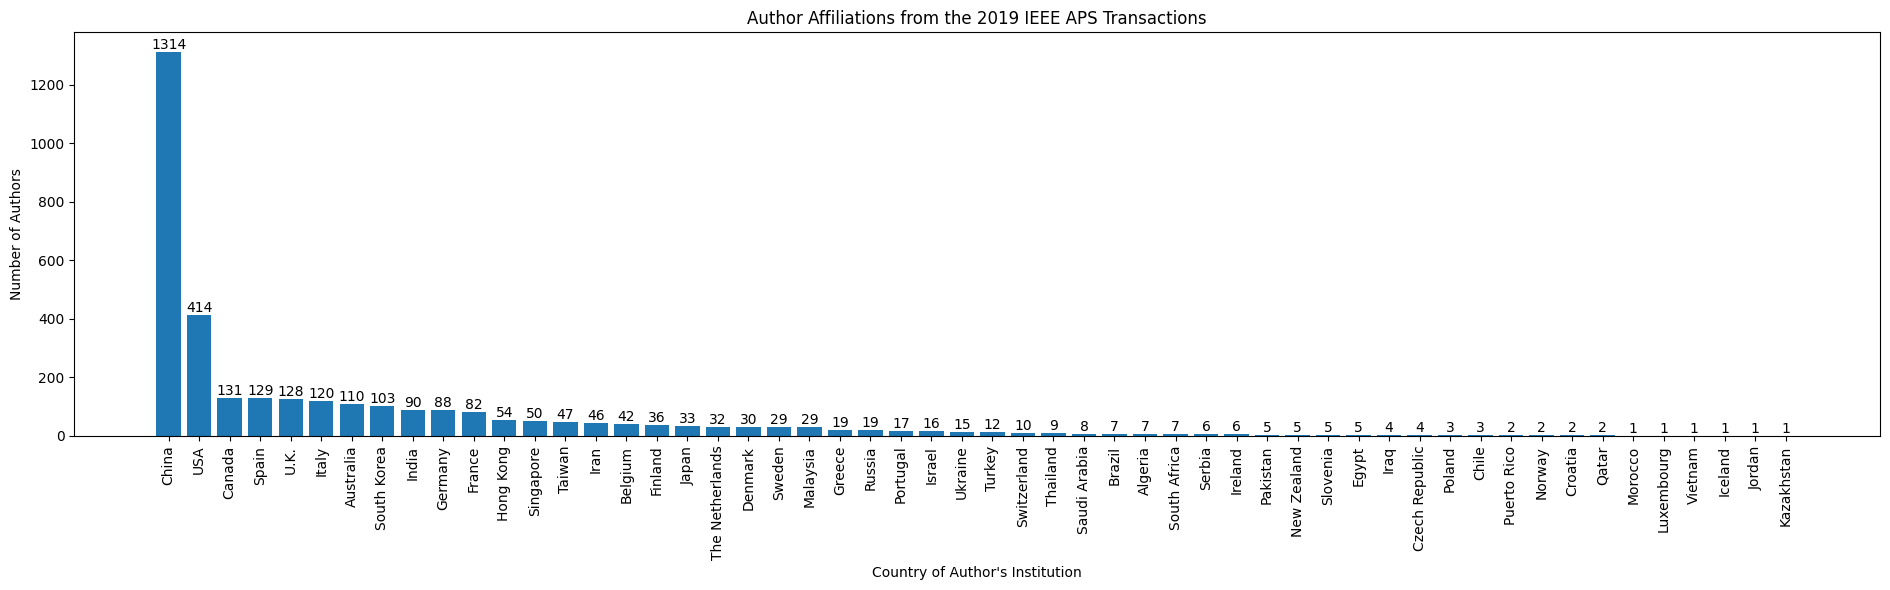

In [70]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [71]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


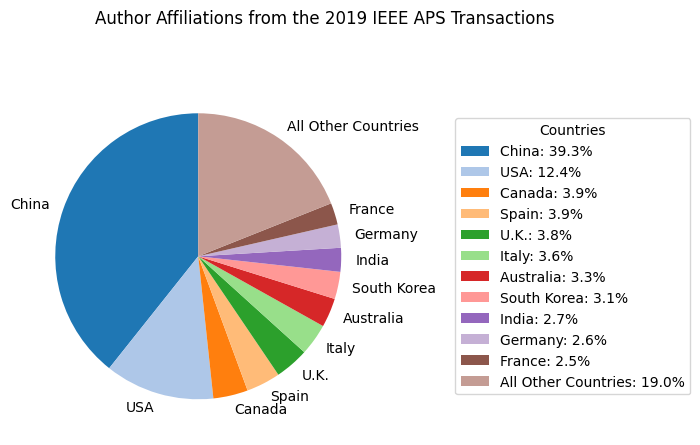

In [72]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()